In [1]:
# The script below is to download the required dataset from github

!git clone https://github.com/acmbpdc/ml-bootcamp-2023.git


!cp /content/ml-bootcamp-2023/docs/03-model-building-ii/Job_Placement_Data.csv /content

Cloning into 'ml-bootcamp-2023'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 208 (delta 43), reused 56 (delta 36), pack-reused 122
Receiving objects: 100% (208/208), 10.22 MiB | 14.74 MiB/s, done.
Resolving deltas: 100% (66/66), done.


# Model Building - II


Now that you know how to build and evaluate basic ML models, we can try to look at some more complex models.

In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn import tree 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## 1. Decision Trees

### 1.1 What is a decision tree?

Decision trees are a type of supervised learning model that are known to perform very well on labeled tabular datasets. These models work by taking a series of decisions and reaching a conclusion.

Let us look at an example


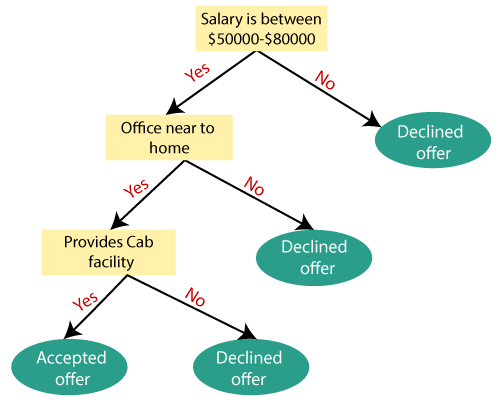

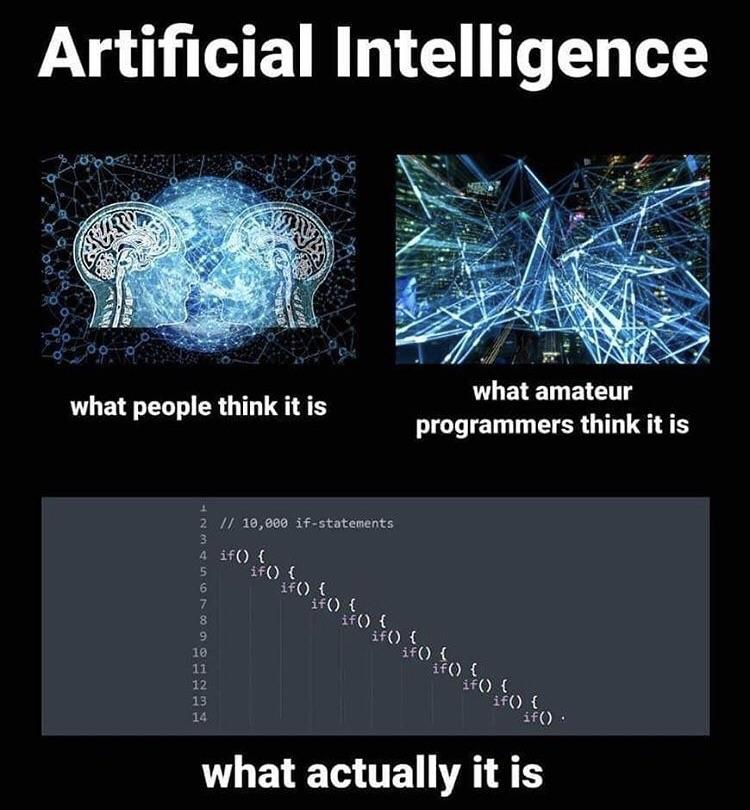

In the above example, we create a decision tree to determine if we will accept a certain job offer.

### 1.2 How do we create these trees?

Let us look at an example dataset and see how we can construct the tree above.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 50000  | Yes           | Yes                 | Startup      | Yes           |
| 45000  | Yes           | Yes                 | Mid-teir     | No            |
| 49000  | No            | Yes                 | Startup      | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 75000  | Yes           | No                  | Corporation  | Yes           |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |


Now we look at the steps to convert this into a tree. Let the "Do we accept?" column be the target column.

1. Find the column that has the greatest impact on the outcome of the target (under the hood we use a formula such as information-gain which tells us how much one column is affected by another column).
2. Split the dataset based on this column.
3. Repeat steps 1 - 2 till we have reached a good solution or our tree has become big enough.

On the above dataset the process will look like this :

1. Identify Salary as the most influential column and find that the split is around 50,000$.
2. Split the dataset based on this. This gives us the following splits:

Above or equal to 50000$.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 75000  | Yes           | No                  | Corporation  | Yes           |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |


Below 50,000$.

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 45000  | Yes           | Yes                 | Mid-teir     | No            |
| 49000  | No            | Yes                 | Startup      | No            |


3. Note that below 50000$ is all no acceptance and label that branch as 'No'.
4. Now split the next tabel based on the next most influential column which is 'Is near home'. Then we get another split.

Is near home = 'Yes'

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | Yes           | Yes                 | Conglomerate | Yes           |
| 75000  | Yes           | No                  | Corporation  | Yes           |

Is near home = 'No'

| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |
| 50000  | No            | Yes                 | Mid-teir     | Yes           |

5. Note that Is near home = 'Yes' has 100% acceptance and label that branch as 'Yes'.

6. We do the final split on the column 'Offers cab service' and this gives us splits that have all yes or all no in both of them.

Offers cab service = 'Yes'


| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 50000  | No            | Yes                 | Mid-teir     | Yes           |


Offers cab service = 'No'


| Salary | Is near home? | Offers cab service? | Company Type | Do we accept? |
|--------|---------------|---------------------|--------------|---------------|
| 55000  | No            | No                  | Corporation  | No            |
| 69000  | No            | No                  | Conglomerate | No            |

7. This lets us arrive at a final answer.

Below we have implemented the above processs in python.

To convert the dataset to numbers:
1. Yes / No becomes 1 and 0.
2. The company type is written like this (corporation - 0, startup - 1, mid-teir - 2, conglomerate - 3).

X is a variable with the inputs and Y is a variable with the targets.


To create the modelwe only need to specify a max_depth which is the maximum number of decisions it is allowed to take before it has to give us an answer. Larger max_depth give better accuracy but smaller max_depth models run and train faster. Based on your data try tweaking this to give the best results.

In [3]:
X = np.array([[55000, 0, 0, 0],
              [50000, 1, 1, 1],
              [45000, 1, 1, 2],
              [49000, 0, 1, 1],
              [69000, 0, 0, 3],
              [75000, 1, 0, 0],
              [50000, 0, 1, 2],
              [55000, 1, 1, 3]])

Y = np.array([0, 1, 0, 0, 0, 1, 1, 1])

clf_tree = DecisionTreeClassifier(max_depth = 3, random_state=6)

clf_tree.fit(X, Y)

print("Loss :", metrics.log_loss(clf_tree.predict(X), Y))

Loss : 2.2204460492503136e-16


### 1.3 Visulization

We can use the in-built plot_tree method to draw a graphical representation of the tree in sklearn.

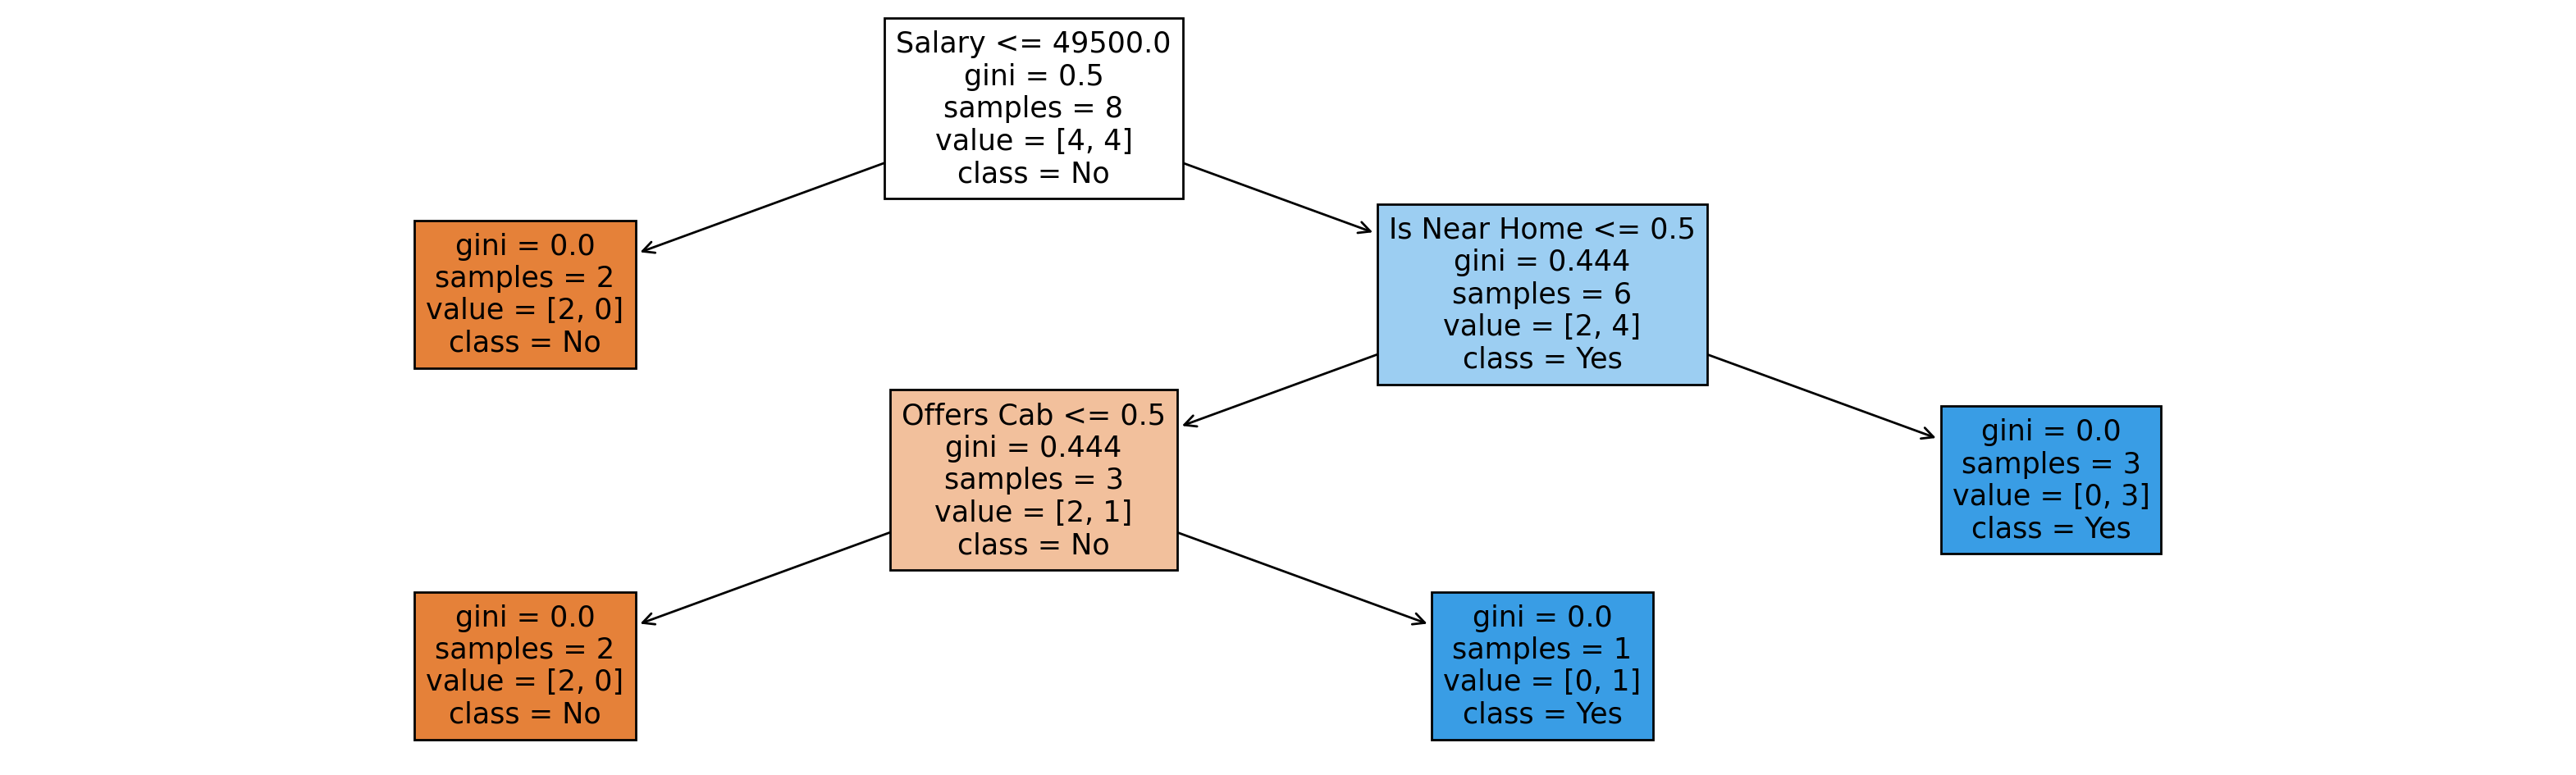

In [4]:
figure(figsize=(20, 6), dpi=200)

tree.plot_tree(clf_tree, filled = True, feature_names = ["Salary", "Is Near Home", "Offers Cab", "Company Type"], class_names = ["No", "Yes"])


plt.show()

### 1.4 Classification on Large Dataset


To show a classification example on real world data, we will use a job placement dataset and try to predict how many college graduates got jobs immediately after graduation.

In [5]:
data = pd.read_csv("/content/Job_Placement_Data.csv")

data = data.drop("specialisation", axis = 1)
data.head()

gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0      M           67.00    Others           91.00    Others    Commerce   
1      M           79.33   Central           78.33    Others     Science   
2      M           65.00   Central           68.00   Central        Arts   
3      M           56.00   Central           52.00   Central     Science   
4      M           85.80   Central           73.60   Central    Commerce   

   degree_percentage undergrad_degree work_experience  emp_test_percentage  \
0              58.00         Sci&Tech              No                 55.0   
1              77.48         Sci&Tech             Yes                 86.5   
2              64.00        Comm&Mgmt              No                 75.0   
3              52.00         Sci&Tech              No                 66.0   
4              73.30        Comm&Mgmt              No                 96.8   

   mba_percent      status  
0        58.80      Placed  
1        66.28      Placed  
2        57.80      Placed  
3        59.43  Not Placed  
4        55.50      Placed

In [6]:
# Convert the string columns to numerical datatypes

data["gender"] = data["gender"].replace(["M"], 0)
data["gender"] = data["gender"].replace(["F"], 1)
data["gender"] = data["gender"].astype(int)

data["ssc_board"] = data["ssc_board"].replace(["Others"], 0)
data["ssc_board"] = data["ssc_board"].replace(["Central"], 1)
data["ssc_board"] = data["ssc_board"].astype(int)

data["hsc_board"] = data["hsc_board"].replace(["Others"], 0)
data["hsc_board"] = data["hsc_board"].replace(["Central"], 1)
data["hsc_board"] = data["hsc_board"].astype(int)

data["hsc_subject"] = data["hsc_subject"].replace(["Commerce"], 0)
data["hsc_subject"] = data["hsc_subject"].replace(["Science"], 1)
data["hsc_subject"] = data["hsc_subject"].replace(["Arts"], 2)
data["hsc_subject"] = data["hsc_subject"].astype(int)

data["undergrad_degree"] = data["undergrad_degree"].replace(["Sci&Tech"], 0)
data["undergrad_degree"] = data["undergrad_degree"].replace(["Comm&Mgmt"], 1)
data["undergrad_degree"] = data["undergrad_degree"].replace(["Others"], 2)
data["undergrad_degree"] = data["undergrad_degree"].astype(int)

data["work_experience"] = data["work_experience"].replace(["No"], 0)
data["work_experience"] = data["work_experience"].replace(["Yes"], 1)
data["work_experience"] = data["work_experience"].astype(int)

data["status"] = data["status"].replace(["Not Placed"], 0)
data["status"] = data["status"].replace(["Placed"], 1)
data["status"] = data["status"].astype(int)

data.head()

gender  ssc_percentage  ssc_board  hsc_percentage  hsc_board  hsc_subject  \
0       0           67.00          0           91.00          0            0   
1       0           79.33          1           78.33          0            1   
2       0           65.00          1           68.00          1            2   
3       0           56.00          1           52.00          1            1   
4       0           85.80          1           73.60          1            0   

   degree_percentage  undergrad_degree  work_experience  emp_test_percentage  \
0              58.00                 0                0                 55.0   
1              77.48                 0                1                 86.5   
2              64.00                 1                0                 75.0   
3              52.00                 0                0                 66.0   
4              73.30                 1                0                 96.8   

   mba_percent  status  
0        58.80       1  
1        66.28       1  
2        57.80       1  
3        59.43       0  
4        55.50       1

In [7]:
# Create training and testing data


thresh = int(len(data) * 90 / 100) # 90% of the data for training, 10% for testing

X_train_clf = data.drop("status", axis = 1).to_numpy()[:thresh]
Y_train_clf = data["status"].to_numpy()[:thresh]

X_test_clf = data.drop("status", axis = 1).to_numpy()[thresh:]
Y_test_clf = data["status"].to_numpy()[thresh:]

We now train a model on this dataset. We have used various models to demonstrate the effect that a change in max_depth can have.

In [8]:
clf_tree_3 = DecisionTreeClassifier(max_depth = 3, random_state=6)

clf_tree_3.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_tree_3.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_tree_3.predict(X_test_clf), Y_test_clf))

Training Loss : 4.668867019315694
Testing Loss : 4.915043643970521


In [9]:
clf_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state=6)

clf_tree_5.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_tree_5.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_tree_5.predict(X_test_clf), Y_test_clf))

Training Loss : 2.4278108500441604
Testing Loss : 1.638347881323507


In [10]:
clf_tree_10 = DecisionTreeClassifier(max_depth = 10, random_state=6)

clf_tree_10.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_tree_10.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_tree_10.predict(X_test_clf), Y_test_clf))

Training Loss : 2.2204460492503136e-16
Testing Loss : 3.276695762647014


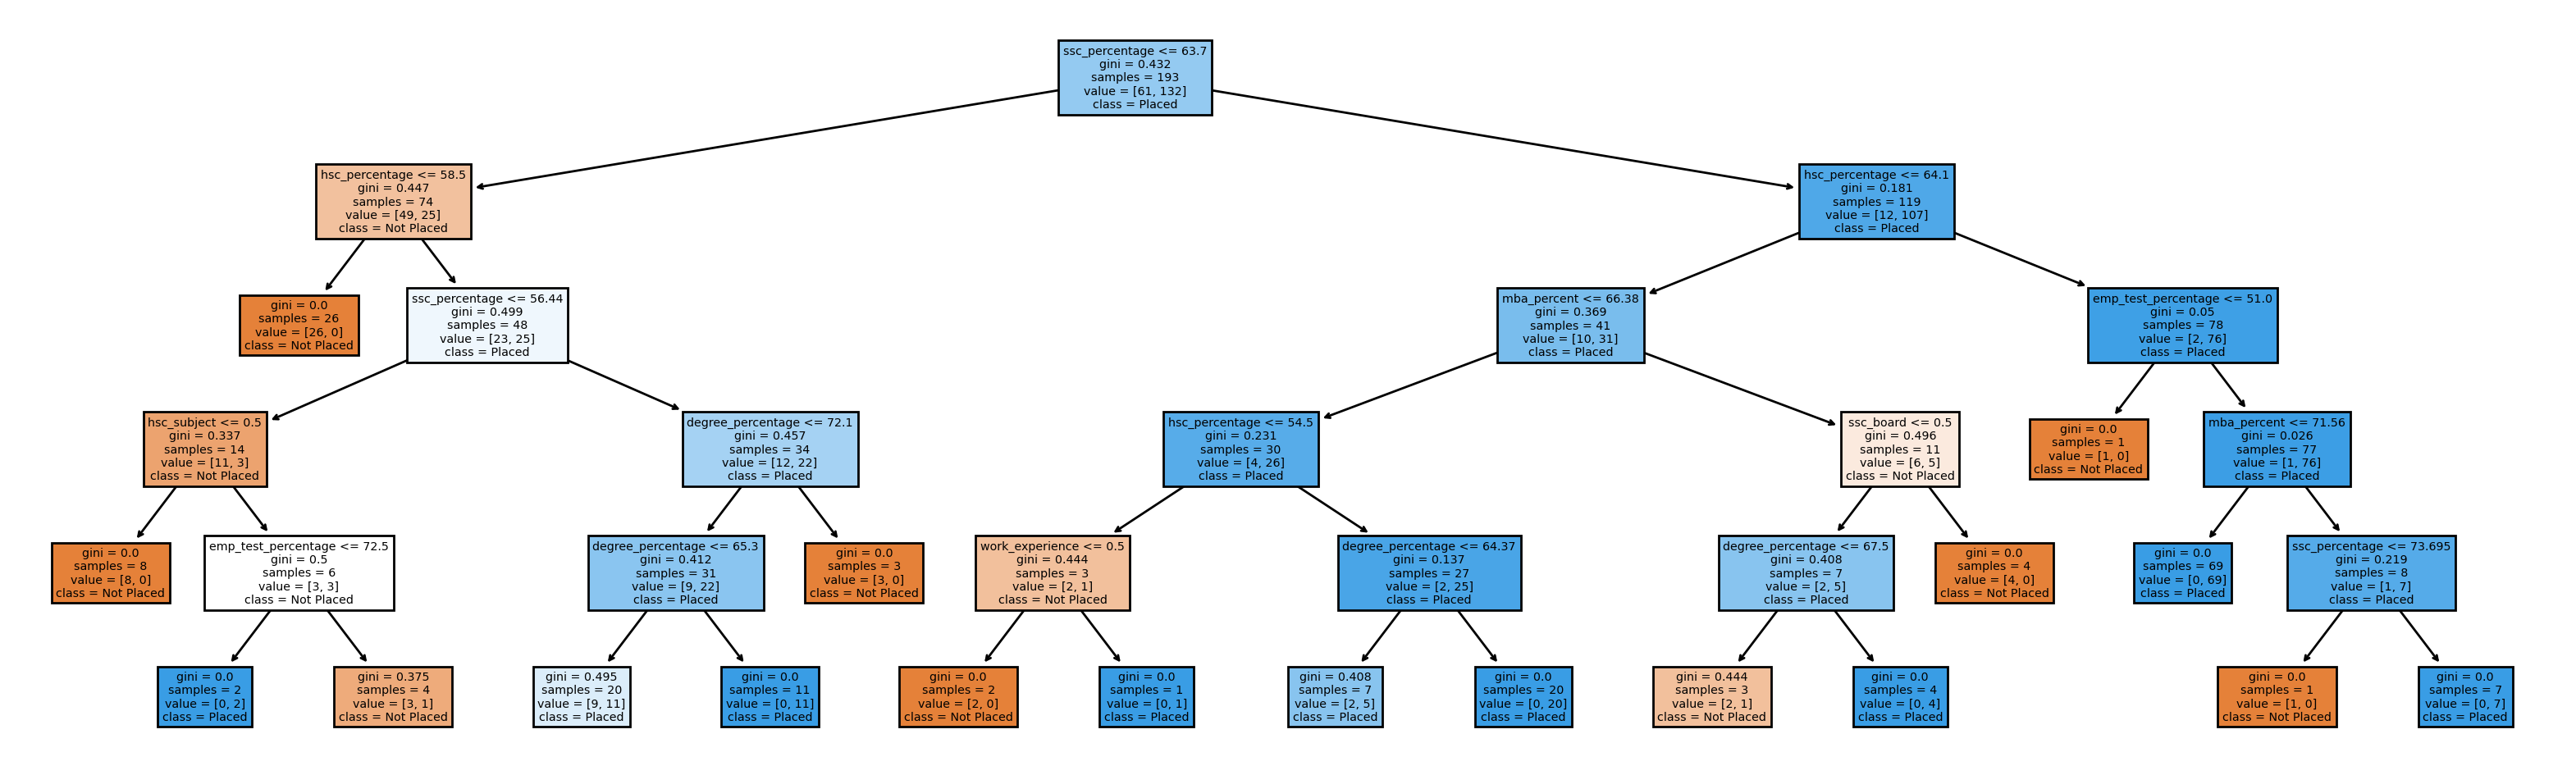

In [11]:
# Visualisation of the best tree

columns_clf = ['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'mba_percent']

figure(figsize=(20, 6), dpi=200)

tree.plot_tree(clf_tree_5, filled = True, feature_names = columns_clf, class_names = ["Not Placed", "Placed"])


plt.show()

Sklearn also allows us to see how important certain features are. This returns a percentage where a percentage x at index i means that the feature i had an x% effect on the outcome.

In [12]:
imp = clf_tree_3.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 0.0% to the final outcome.
The feature ssc_percentage contributed 66.48353667011999% to the final outcome.
The feature ssc_board contributed 0.0% to the final outcome.
The feature hsc_percentage contributed 23.97924563855191% to the final outcome.
The feature hsc_board contributed 0.0% to the final outcome.
The feature hsc_subject contributed 0.0% to the final outcome.
The feature degree_percentage contributed 0.0% to the final outcome.
The feature undergrad_degree contributed 0.0% to the final outcome.
The feature work_experience contributed 0.0% to the final outcome.
The feature emp_test_percentage contributed 3.938604110728931% to the final outcome.
The feature mba_percent contributed 5.598613580599159% to the final outcome.


In [13]:
imp = clf_tree_5.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 0.0% to the final outcome.
The feature ssc_percentage contributed 50.43056953304579% to the final outcome.
The feature ssc_board contributed 3.828157639961312% to the final outcome.
The feature hsc_percentage contributed 20.05383678208535% to the final outcome.
The feature hsc_board contributed 0.0% to the final outcome.
The feature hsc_subject contributed 2.5265840423744668% to the final outcome.
The feature degree_percentage contributed 11.790404432890995% to the final outcome.
The feature undergrad_degree contributed 0.0% to the final outcome.
The feature work_experience contributed 1.9651209218468062% to the final outcome.
The feature emp_test_percentage contributed 5.045560848413108% to the final outcome.
The feature mba_percent contributed 4.3597657993821946% to the final outcome.


In [14]:
imp = clf_tree_10.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 4.793840039741679% to the final outcome.
The feature ssc_percentage contributed 42.02240769612596% to the final outcome.
The feature ssc_board contributed 0.0% to the final outcome.
The feature hsc_percentage contributed 19.502758524823726% to the final outcome.
The feature hsc_board contributed 0.0% to the final outcome.
The feature hsc_subject contributed 2.0545028741750064% to the final outcome.
The feature degree_percentage contributed 11.68573279919383% to the final outcome.
The feature undergrad_degree contributed 0.0% to the final outcome.
The feature work_experience contributed 0.0% to the final outcome.
The feature emp_test_percentage contributed 8.488109277317655% to the final outcome.
The feature mba_percent contributed 11.452648788622147% to the final outcome.


### 1.5 Regression Using Trees


Just like classification, trees can also predict numeric values using regression. Here we try to use trees to predict the housing prices in California using basic tree models.

In [15]:
train_data = pd.read_csv("/content/sample_data/california_housing_train.csv")

train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [16]:
test_data = pd.read_csv("/content/sample_data/california_housing_test.csv")

test_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0

In [17]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [18]:
X_train_reg = train_data.drop("median_house_value", axis = 1).to_numpy()
Y_train_reg = train_data["median_house_value"].to_numpy()

X_test_reg = test_data.drop("median_house_value", axis = 1).to_numpy()
Y_test_reg = test_data["median_house_value"].to_numpy()

In [19]:
reg_tree = DecisionTreeRegressor(max_depth = 10, random_state=6)

reg_tree.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_tree.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_tree.predict(X_test_reg), Y_test_reg))

Training Loss : 30800.111026813956
Testing Loss : 40980.01788411865


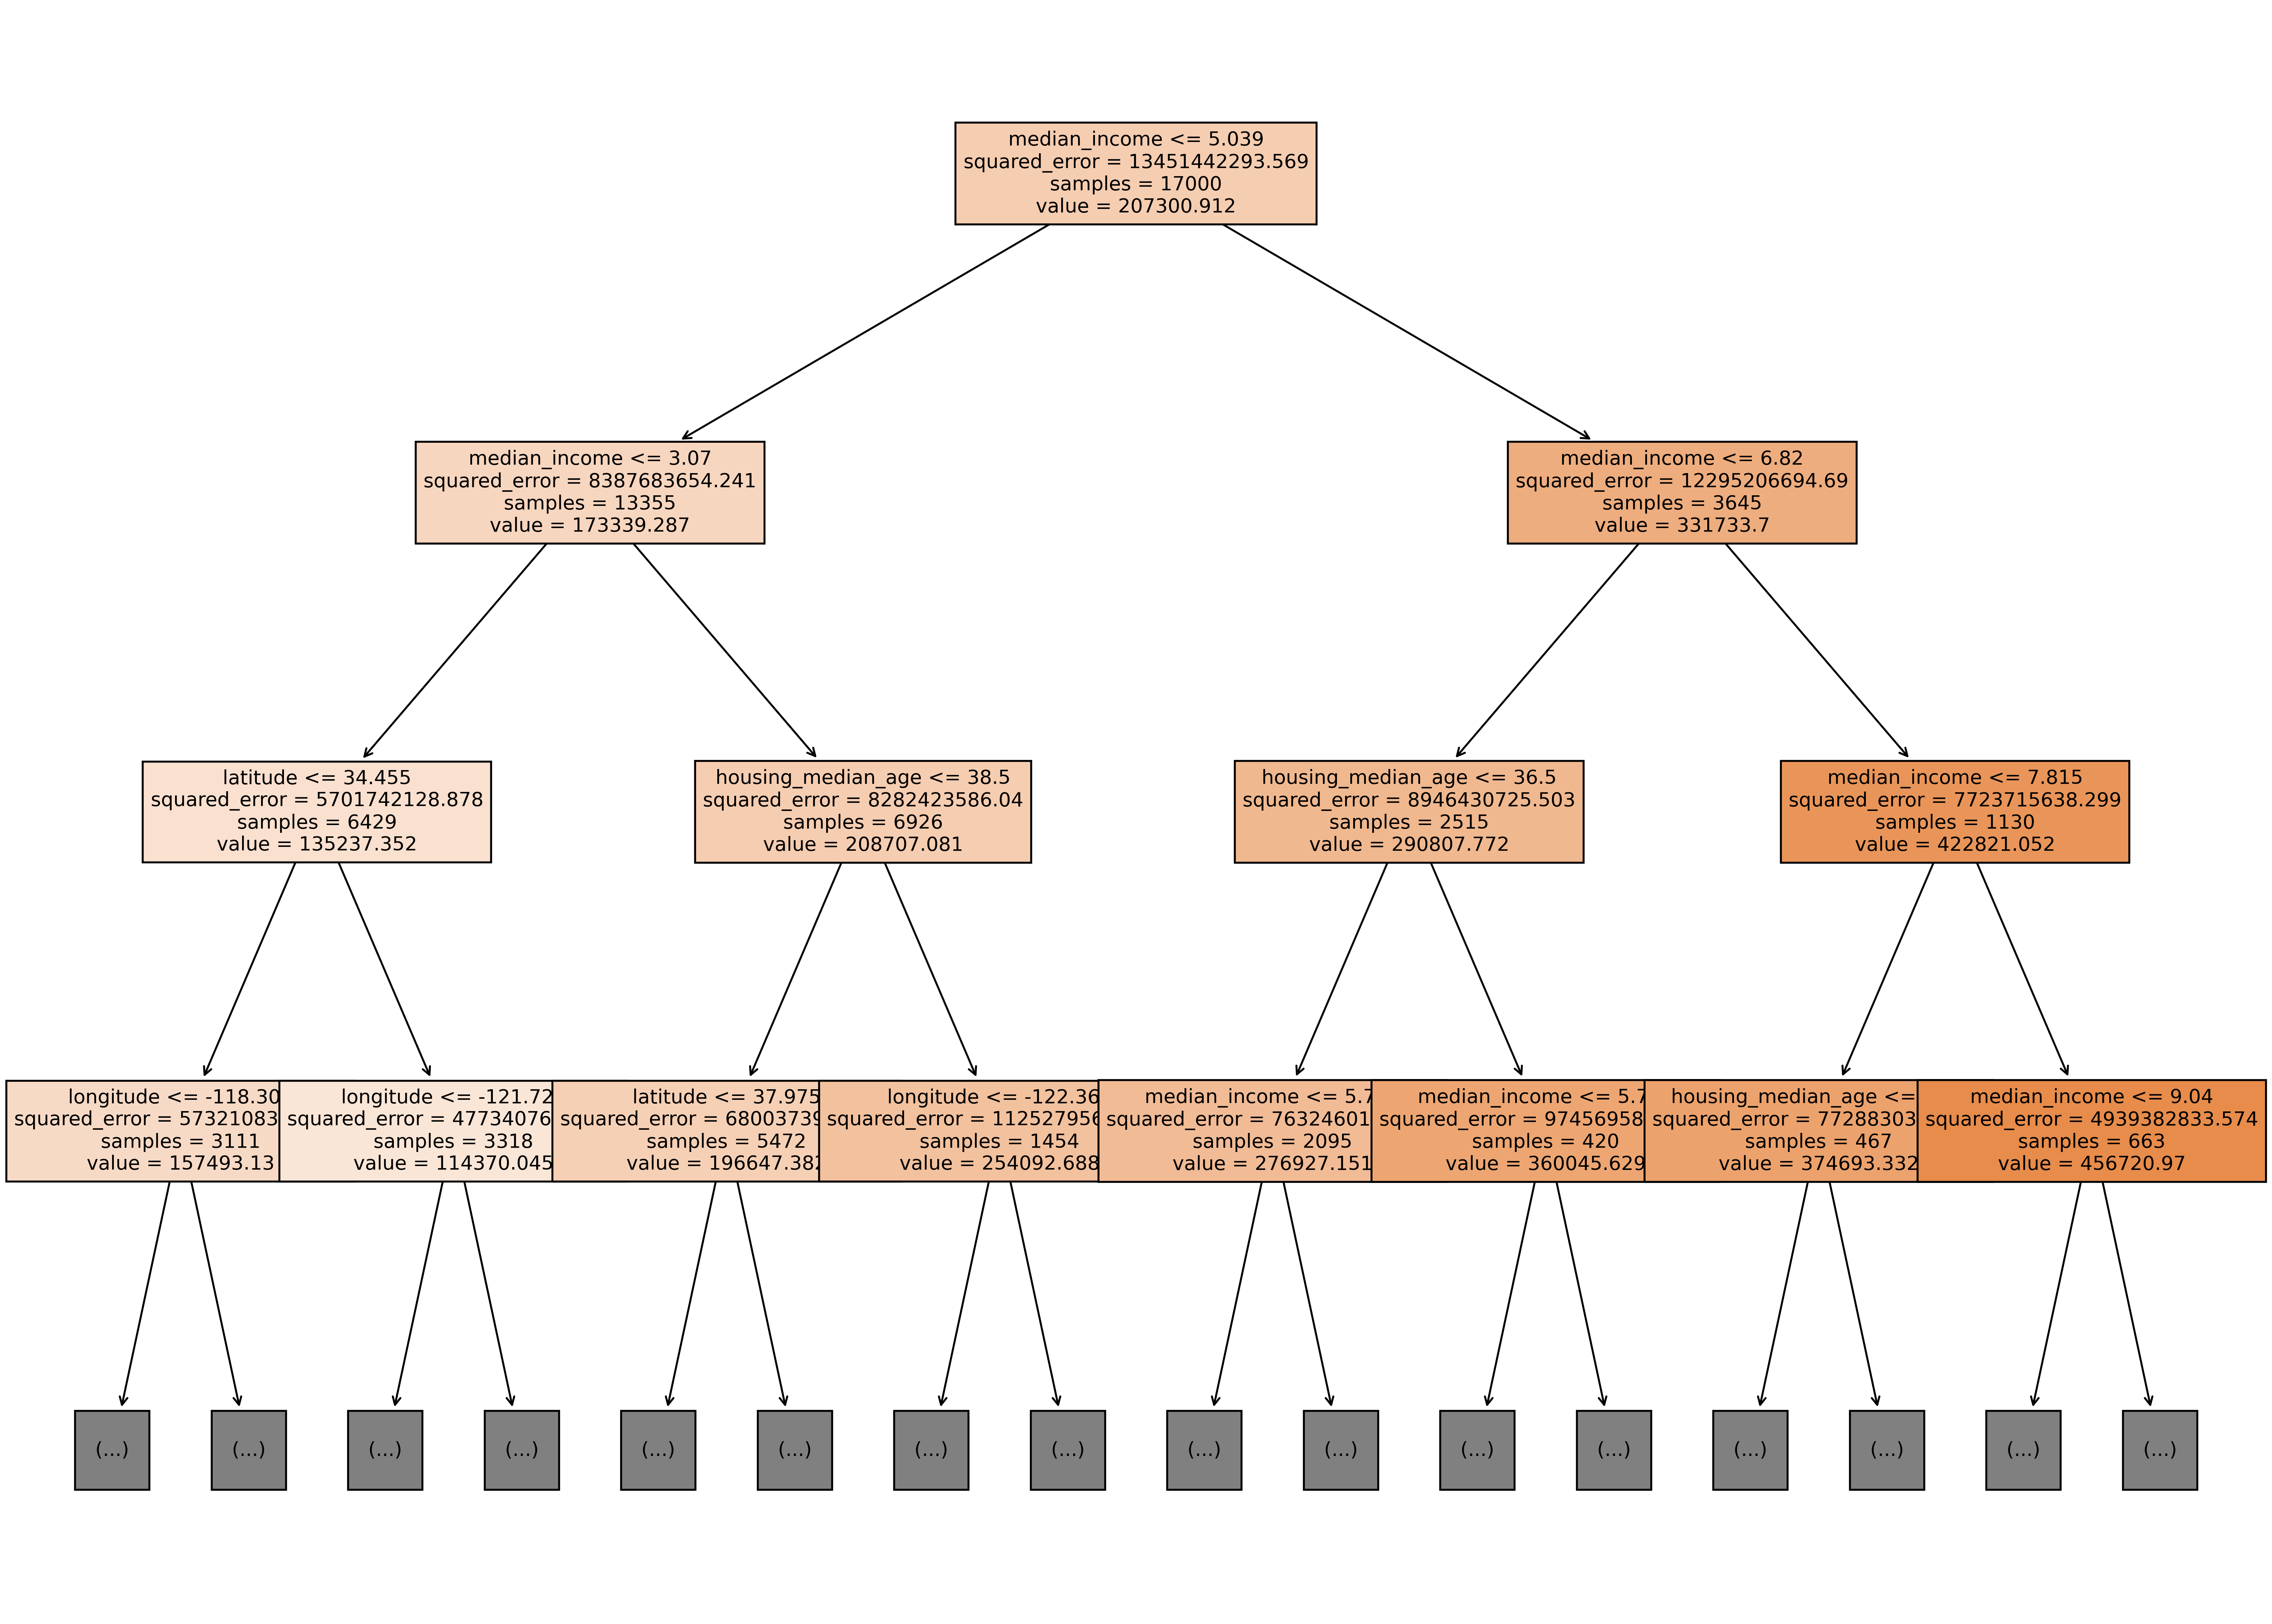

In [20]:
# Visualisation of the best tree

reg_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

figure(figsize=(20, 15), dpi=400)

tree.plot_tree(reg_tree, filled = True, feature_names = reg_columns, 
               max_depth = 3, fontsize=10) # limit the tree to only show the first 3 nodes


plt.show()

In [21]:
imp = reg_tree.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature longitude contributed 15.563208438870904% to the final outcome.
The feature latitude contributed 16.638618610215868% to the final outcome.
The feature housing_median_age contributed 5.47142054781178% to the final outcome.
The feature total_rooms contributed 0.756339018155957% to the final outcome.
The feature total_bedrooms contributed 1.1302896974804952% to the final outcome.
The feature population contributed 1.3768003197204541% to the final outcome.
The feature households contributed 0.7456319540808211% to the final outcome.
The feature median_income contributed 58.31769141366372% to the final outcome.


We can plot these feature importantances on a bar graph to visualise the distribution among the features.

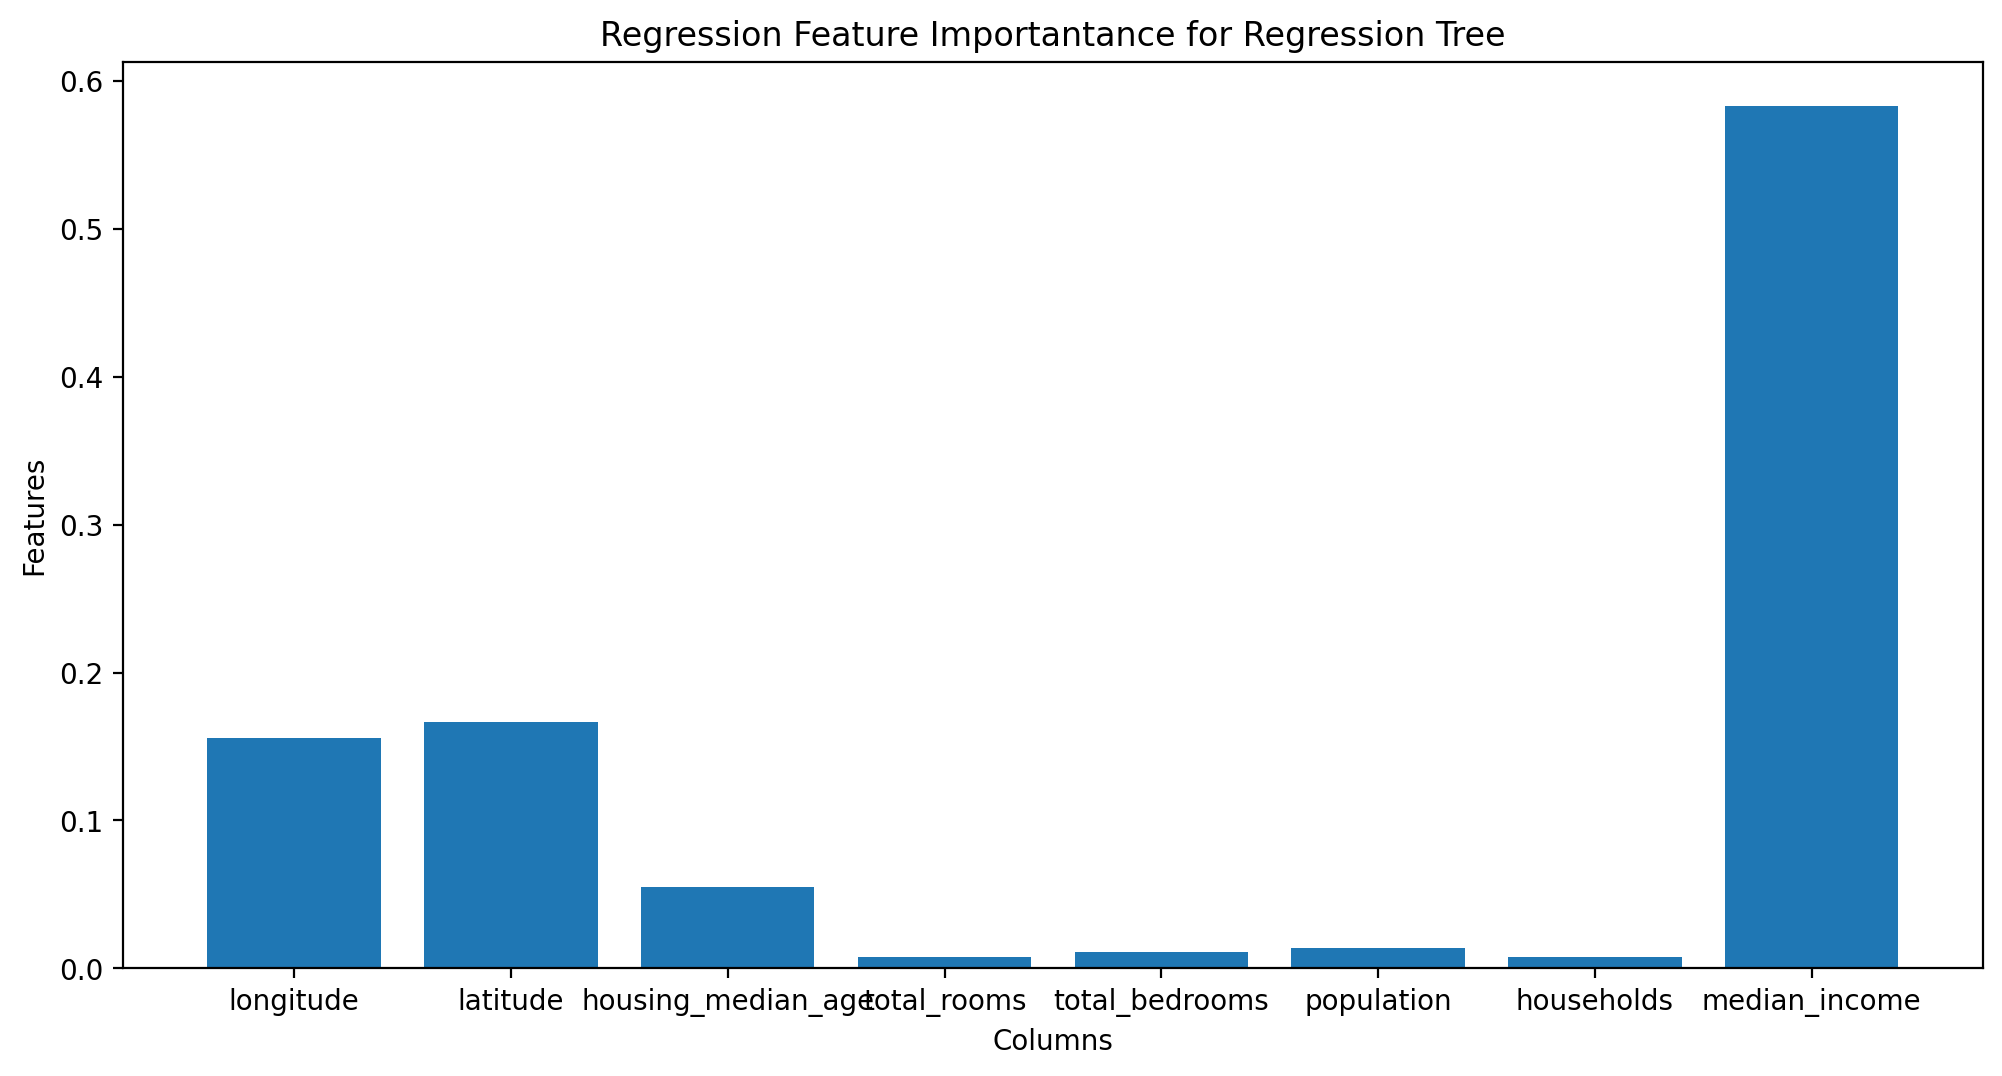

In [22]:
figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_tree.feature_importances_)
plt.title("Regression Feature Importantance for Regression Tree")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

## 2. Random Forest Models


In random forest models, we train multiple decision trees on different subsets of the data and then have them vote on the correct answer. If it is a regression problem, we simply average out the results.


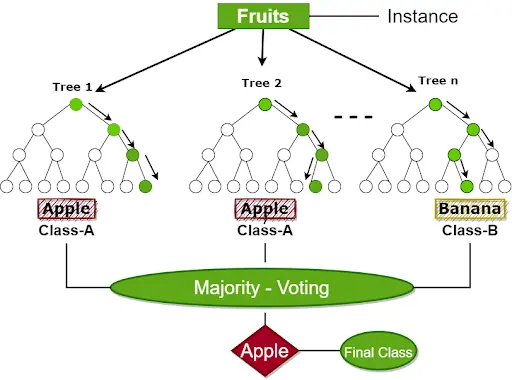

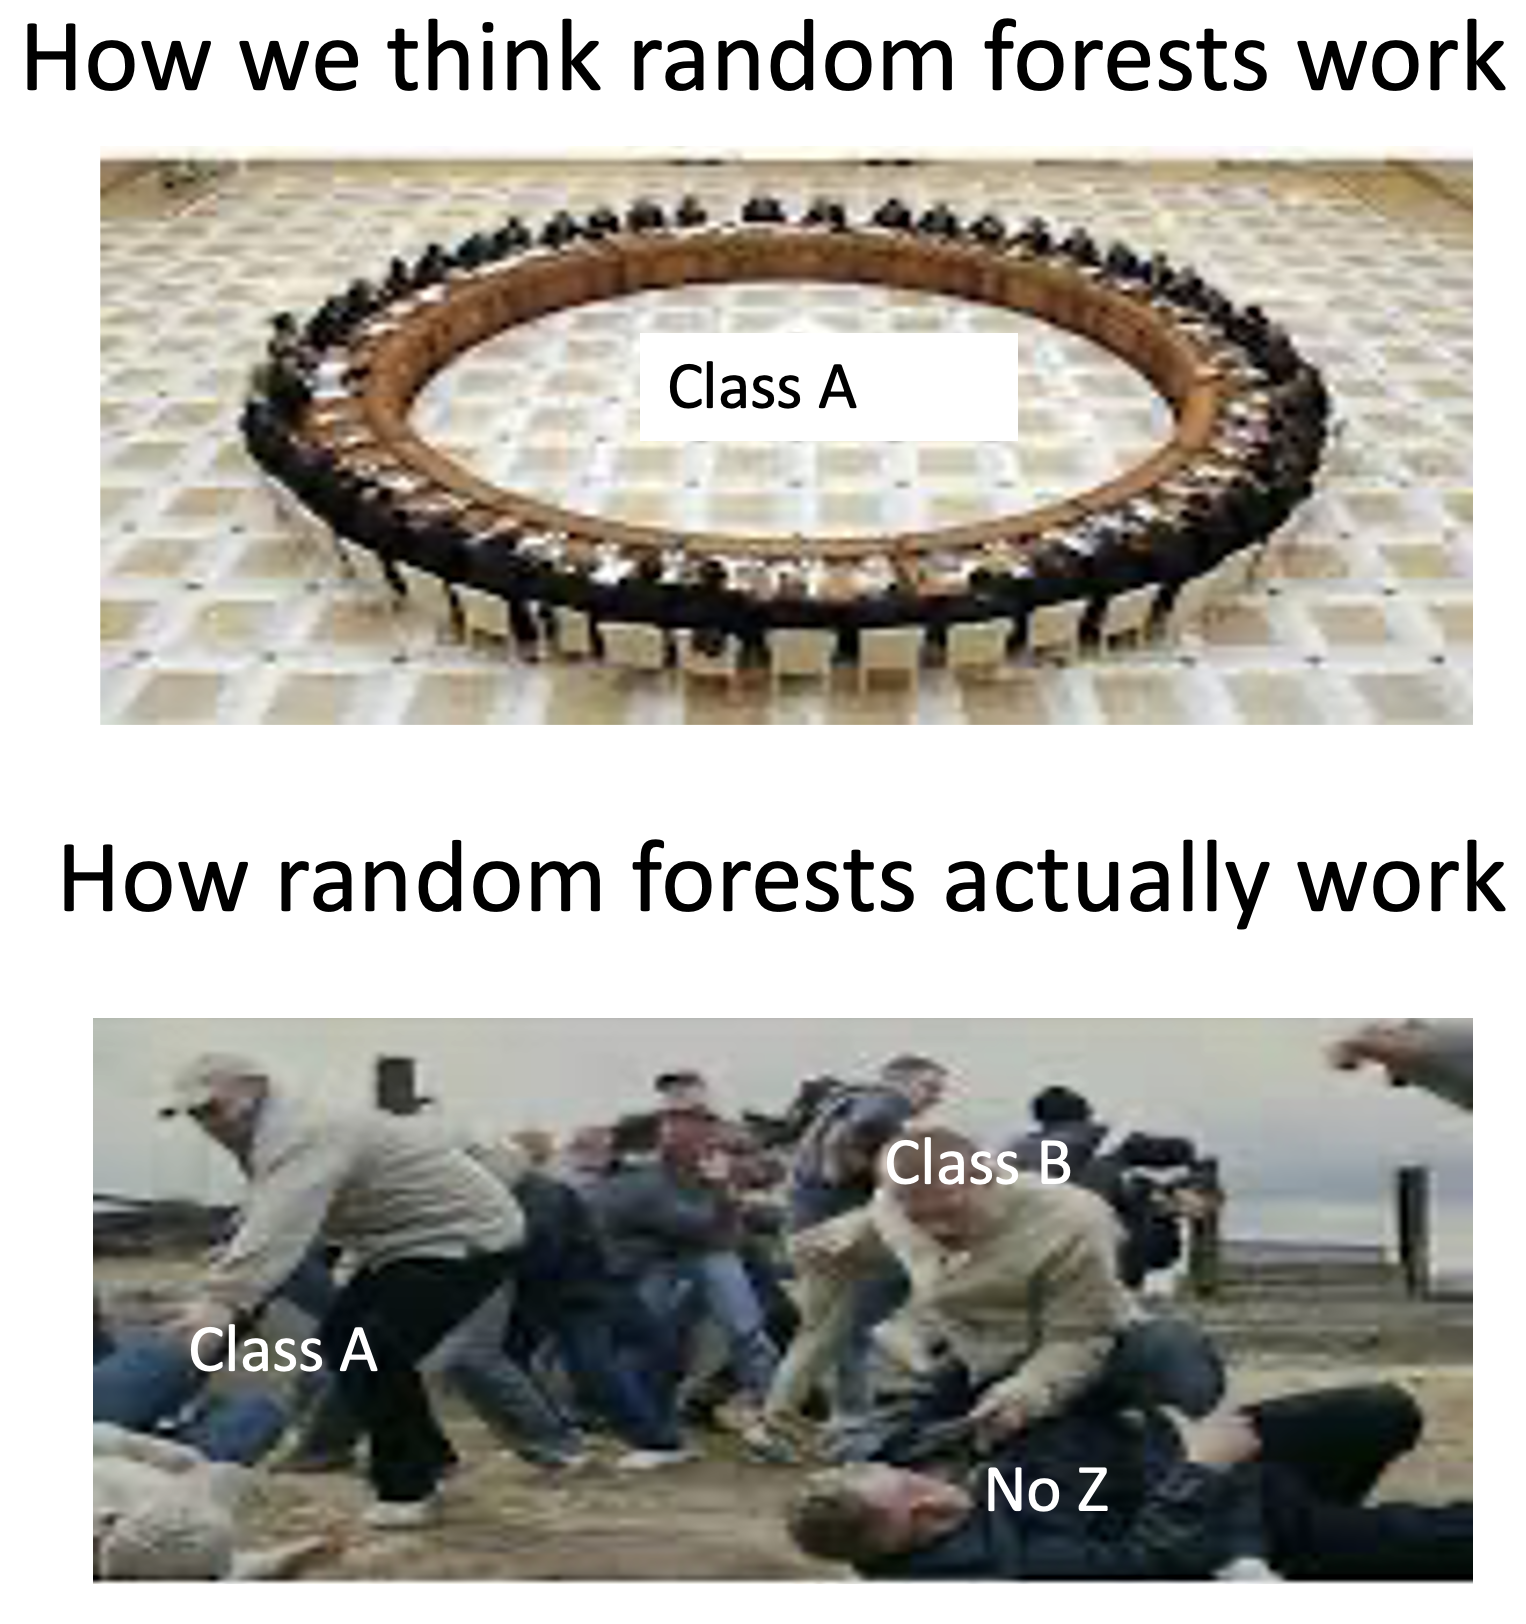

### 2.1 Random Forest Hyper-parameters

Below are the main hyper-parameters you will need to choose when building a random forest model.

1. n_estimators -> The number of trees that will be used.
2. max_depth -> The maximum depth of each tree.


We also put n_jobs = -1, this just tells the computer that it can use as much of the CPU as it wants to train our model very fast. If we want to use less of our CPU capacity we can set this to the maximum number of cores we want it to use.

### 2.2 Randon Forest Classification

In [23]:
clf_rf = RandomForestClassifier(n_estimators = 10, max_depth=4, n_jobs = -1, random_state=3)

clf_rf.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_rf.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_rf.predict(X_test_clf), Y_test_clf))

Training Loss : 2.6145655308167886
Testing Loss : 3.276695762647014


We find the overall usefulness of our features. It can be insightful to learn how different types of models utilise the same features.

In [24]:
imp = clf_rf.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 2.476268002793741% to the final outcome.
The feature ssc_percentage contributed 39.17332987490621% to the final outcome.
The feature ssc_board contributed 0.7069502237031067% to the final outcome.
The feature hsc_percentage contributed 26.09725934630589% to the final outcome.
The feature hsc_board contributed 0.5067132545473519% to the final outcome.
The feature hsc_subject contributed 0.6717982121899062% to the final outcome.
The feature degree_percentage contributed 13.244724987267862% to the final outcome.
The feature undergrad_degree contributed 0.4140200215186999% to the final outcome.
The feature work_experience contributed 3.6352319689183274% to the final outcome.
The feature emp_test_percentage contributed 5.314210141235138% to the final outcome.
The feature mba_percent contributed 7.759493966613765% to the final outcome.


We can also extract and view the individual trees in our random forests. Where clf_rf.estimators_ returns an array of all the trees.

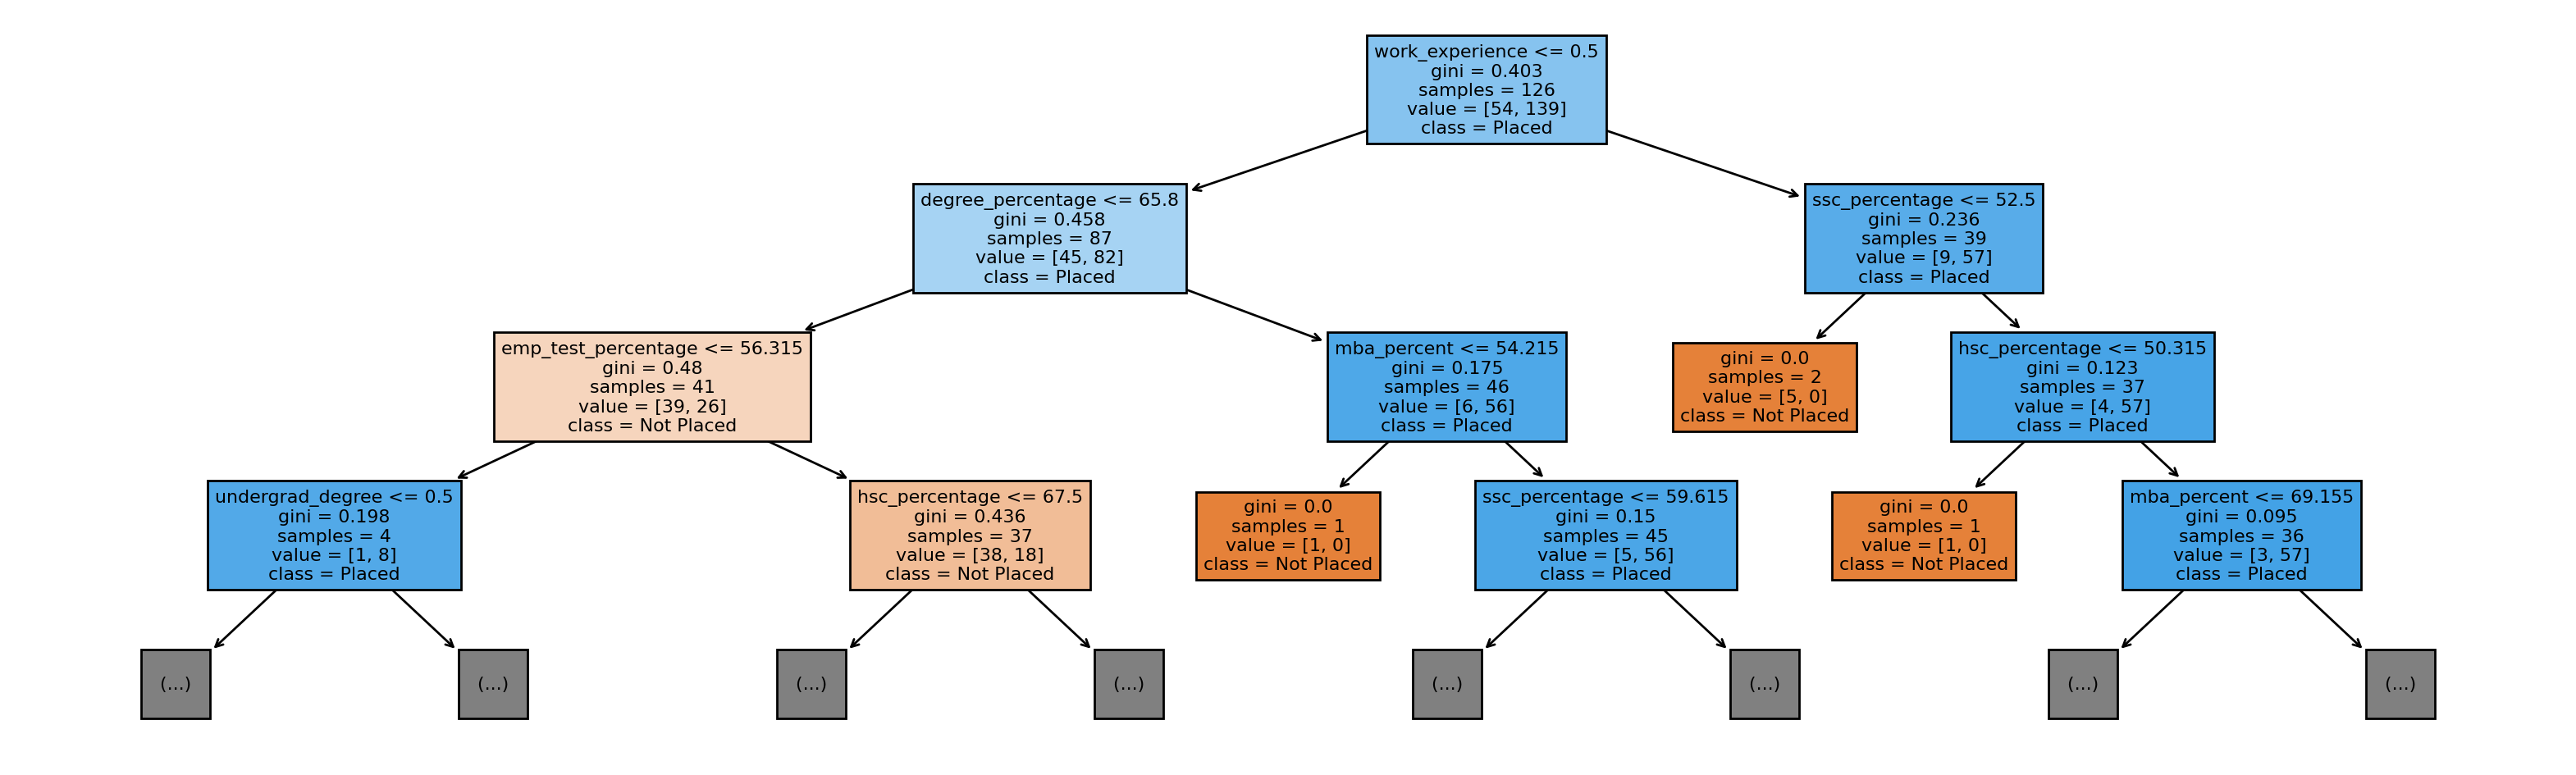

In [25]:
rf_trees = clf_rf.estimators_


tree_0 = rf_trees[0]

figure(figsize=(20, 6), dpi=200)

tree.plot_tree(tree_0, filled = True, feature_names = columns_clf, class_names = ["Not Placed", "Placed"], max_depth = 3)


plt.show()

### 2.3 Randon Forest Regression


We now apply random forest models to our regression dataset.

In [26]:
reg_rf = RandomForestRegressor(n_estimators = 50, max_depth=15, n_jobs = -1, random_state=3)

reg_rf.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_rf.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_rf.predict(X_test_reg), Y_test_reg))

Training Loss : 16885.276048778334
Testing Loss : 32885.32294525358


In [27]:
imp = reg_rf.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature longitude contributed 16.289192107492408% to the final outcome.
The feature latitude contributed 15.194999333209443% to the final outcome.
The feature housing_median_age contributed 5.924326019352224% to the final outcome.
The feature total_rooms contributed 2.1172321958206175% to the final outcome.
The feature total_bedrooms contributed 2.4519246097281338% to the final outcome.
The feature population contributed 3.2494812901481893% to the final outcome.
The feature households contributed 1.8252991866551616% to the final outcome.
The feature median_income contributed 52.94754525759383% to the final outcome.


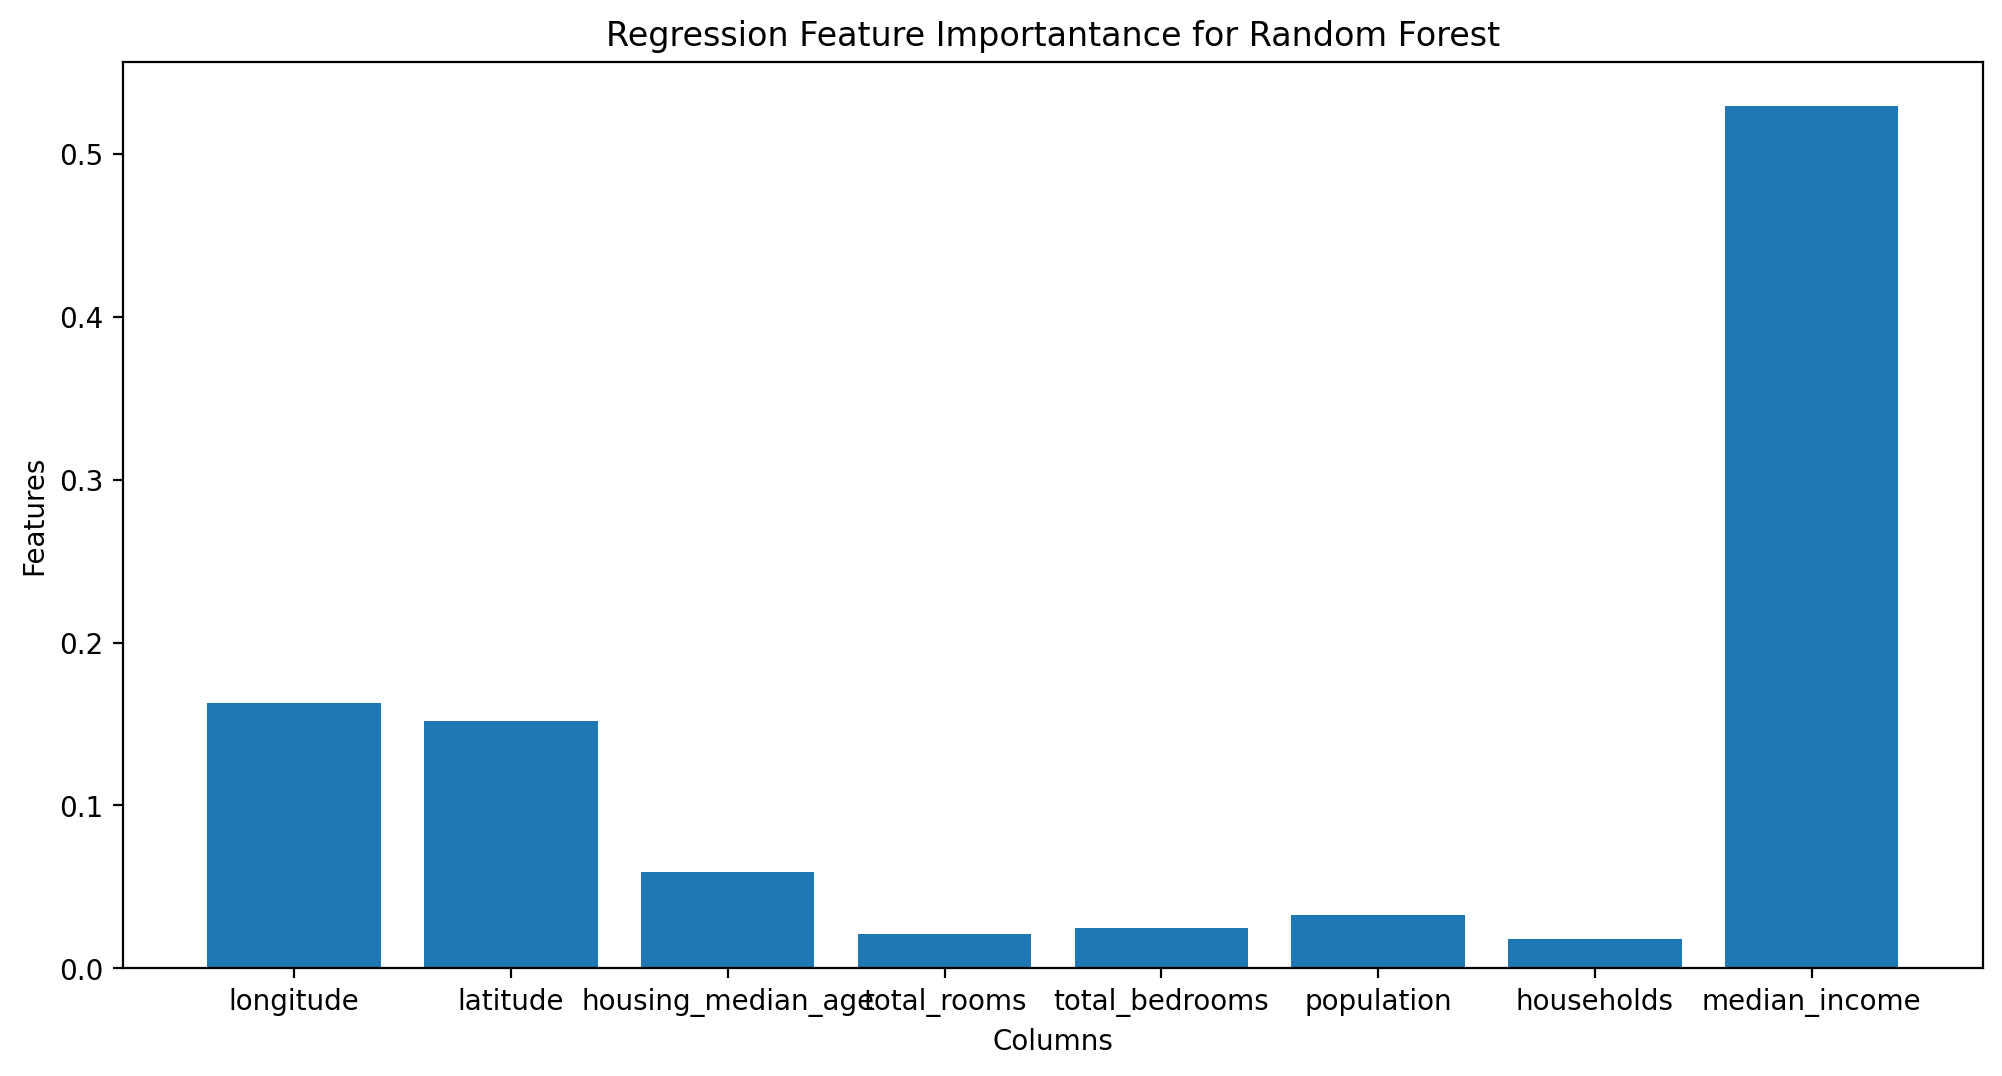

In [28]:
figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_rf.feature_importances_)
plt.title("Regression Feature Importantance for Random Forest")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

## 3. Gradient Boosted Trees


Gradient boosted trees are models that utilise a chain of decision trees to make predictions. It generally follows these steps:

1. Train an initial tree on the data.
2. Gauge the overall error of this tree.
3. Train a new tree that aims to rectify the mistakes of the prior tree instead of learning from scratch.
4. Use the new tree to modify the answers of the previous tree
5. Re-evaluate after the new tree corrects the answers.
6. Repeat steps 3 - 5 for N number of trees.
7. The final results is formed after (N - 1) trees correct each other’s mistakes.

For a fast and powerful implementation of such models we use the XGBoost library in these examples. Other popular trees include LGBM and ADA boost trees.

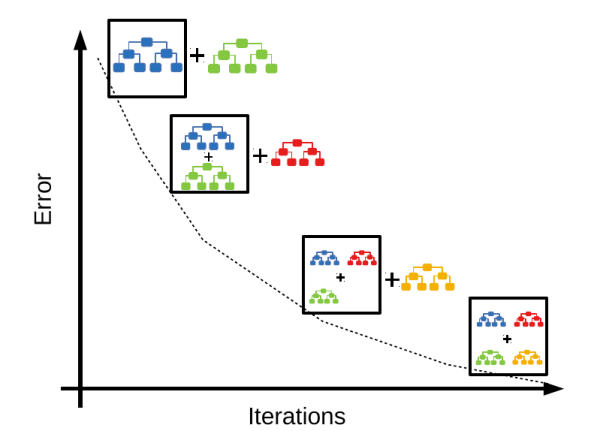

### 3.1 XGBoost and the main Hyper-parameters

Xgboost is a more complex and efficient form of the normal gradient boosting algorithm. It is also optimised to run efficiently on both CPU and GPU hardware. Below are the main hyper-parameters you will need to choose when building an xgboost model.

1. n_estimators -> The number of trees that will be chained together.
2. max_depth -> The maximum depth of each tree in the chain.




Note that the xgboost library stores trees iin a different format and therefore is not compatible with the plot_tree method of sklearn.

### 3.2 XGBoost Classification

In [29]:
clf_xgb = XGBClassifier(n_estimators = 20, max_depth=7, n_jobs = -1, seed=3)

clf_xgb.fit(X_train_clf, Y_train_clf)

print("Training Loss :", metrics.log_loss(clf_xgb.predict(X_train_clf), Y_train_clf))

print("Testing Loss :", metrics.log_loss(clf_xgb.predict(X_test_clf), Y_test_clf))

Training Loss : 2.2204460492503136e-16
Testing Loss : 1.638347881323507


In [30]:
imp = clf_xgb.feature_importances_

for i in range(len(columns_clf)):
  print(f"The feature {columns_clf[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature gender contributed 6.948573887348175% to the final outcome.
The feature ssc_percentage contributed 31.114697456359863% to the final outcome.
The feature ssc_board contributed 7.817109674215317% to the final outcome.
The feature hsc_percentage contributed 12.224050611257553% to the final outcome.
The feature hsc_board contributed 9.053606539964676% to the final outcome.
The feature hsc_subject contributed 4.565470293164253% to the final outcome.
The feature degree_percentage contributed 8.493304997682571% to the final outcome.
The feature undergrad_degree contributed 3.12301442027092% to the final outcome.
The feature work_experience contributed 5.7991500943899155% to the final outcome.
The feature emp_test_percentage contributed 4.420216009020805% to the final outcome.
The feature mba_percent contributed 6.4408086240291595% to the final outcome.


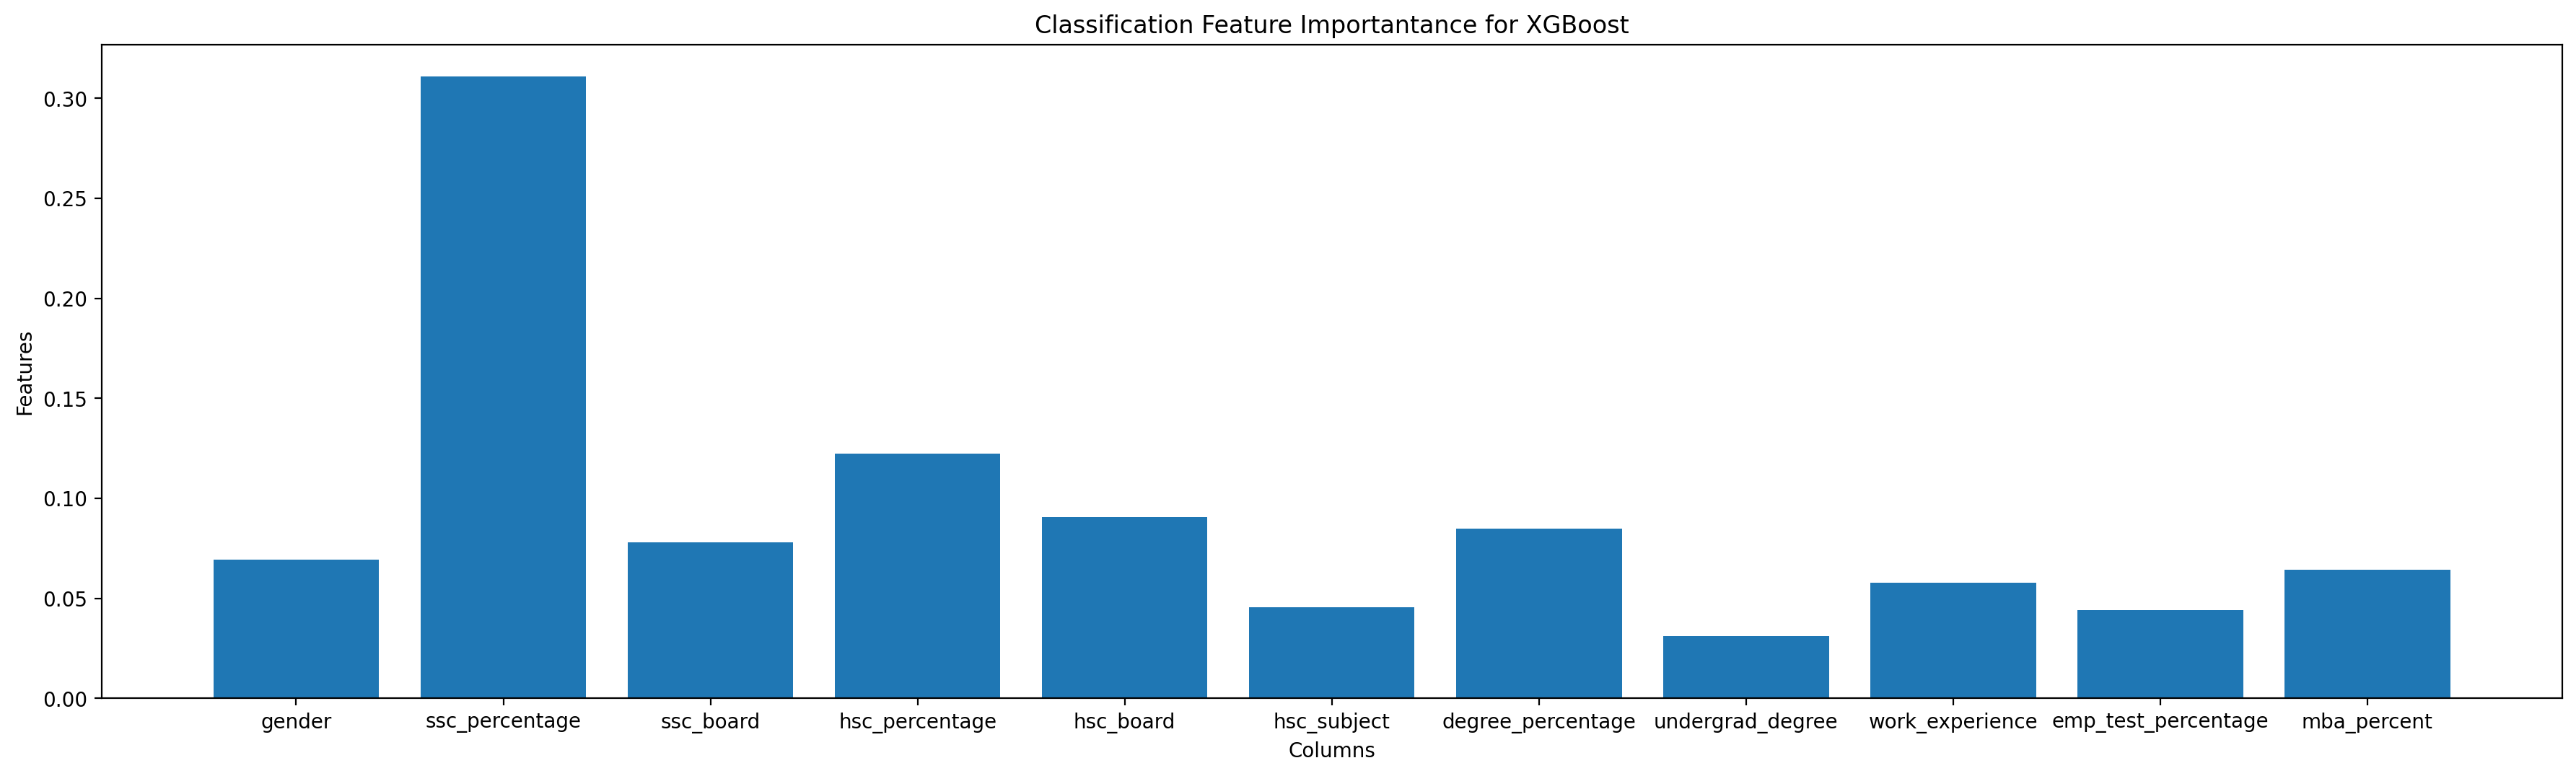

In [31]:
figure(figsize=(22, 6), dpi=200)

plt.bar(columns_clf, clf_xgb.feature_importances_)
plt.title("Classification Feature Importantance for XGBoost")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

### 3.3 XGBoost Regression

In [32]:
reg_xgb = XGBRegressor(n_estimators = 10, max_depth=15, n_jobs = -1, seed=3)

reg_xgb.fit(X_train_reg, Y_train_reg)

print("Training Loss :", metrics.mean_absolute_error(reg_xgb.predict(X_train_reg), Y_train_reg))

print("Testing Loss :", metrics.mean_absolute_error(reg_xgb.predict(X_test_reg), Y_test_reg))

Training Loss : 11537.345794404871
Testing Loss : 33966.77883138021


In [33]:
imp = reg_xgb.feature_importances_

for i in range(len(reg_columns)):
  print(f"The feature {reg_columns[i]} contributed {imp[i] * 100}% to the final outcome.")

The feature longitude contributed 8.241652697324753% to the final outcome.
The feature latitude contributed 11.12857386469841% to the final outcome.
The feature housing_median_age contributed 7.736917585134506% to the final outcome.
The feature total_rooms contributed 1.9546587020158768% to the final outcome.
The feature total_bedrooms contributed 3.9520476013422012% to the final outcome.
The feature population contributed 3.655128926038742% to the final outcome.
The feature households contributed 2.4359479546546936% to the final outcome.
The feature median_income contributed 60.89507341384888% to the final outcome.


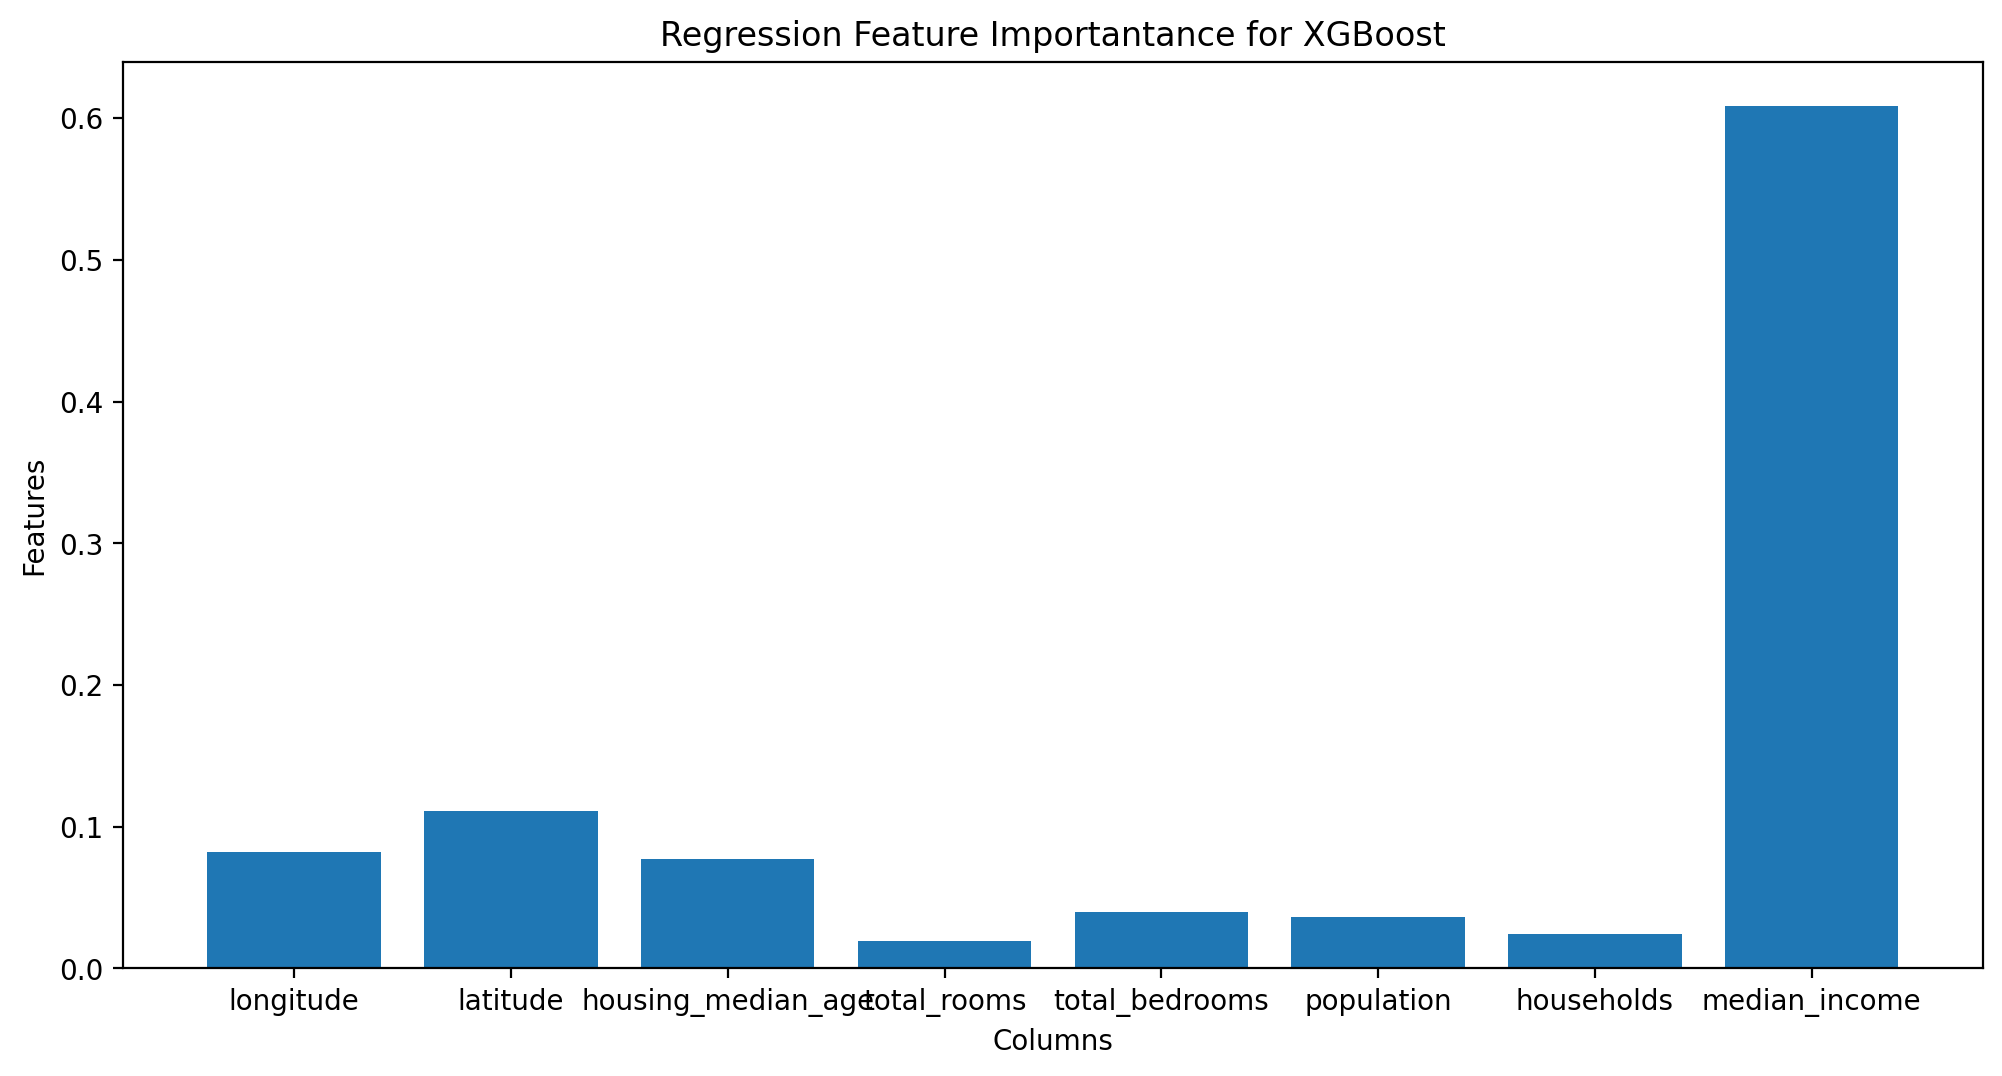

In [34]:
figure(figsize=(12, 6), dpi=200)

plt.bar(reg_columns, reg_xgb.feature_importances_)
plt.title("Regression Feature Importantance for XGBoost")
plt.xlabel("Columns")
plt.ylabel("Features")
plt.show()

## 4. Comparing Performance of Model Types

### 4.1 Classification


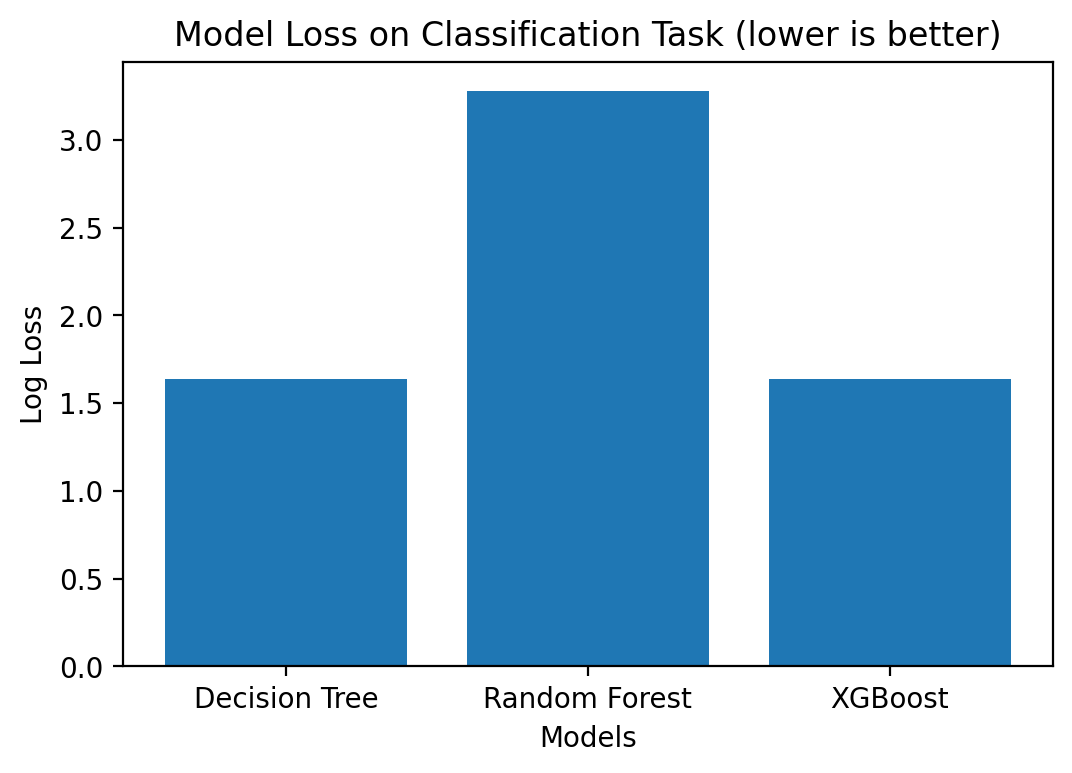

In [35]:
tree_loss = metrics.log_loss(clf_tree_5.predict(X_test_clf), Y_test_clf)
rf_loss = metrics.log_loss(clf_rf.predict(X_test_clf), Y_test_clf)
xgb_loss = metrics.log_loss(clf_xgb.predict(X_test_clf), Y_test_clf)


figure(figsize=(6, 4), dpi=200)

plt.bar(["Decision Tree", "Random Forest", "XGBoost"], [tree_loss, rf_loss, xgb_loss])
plt.title("Model Loss on Classification Task (lower is better)")
plt.xlabel("Models")
plt.ylabel("Log Loss")
plt.show()

### 4.2 Regression

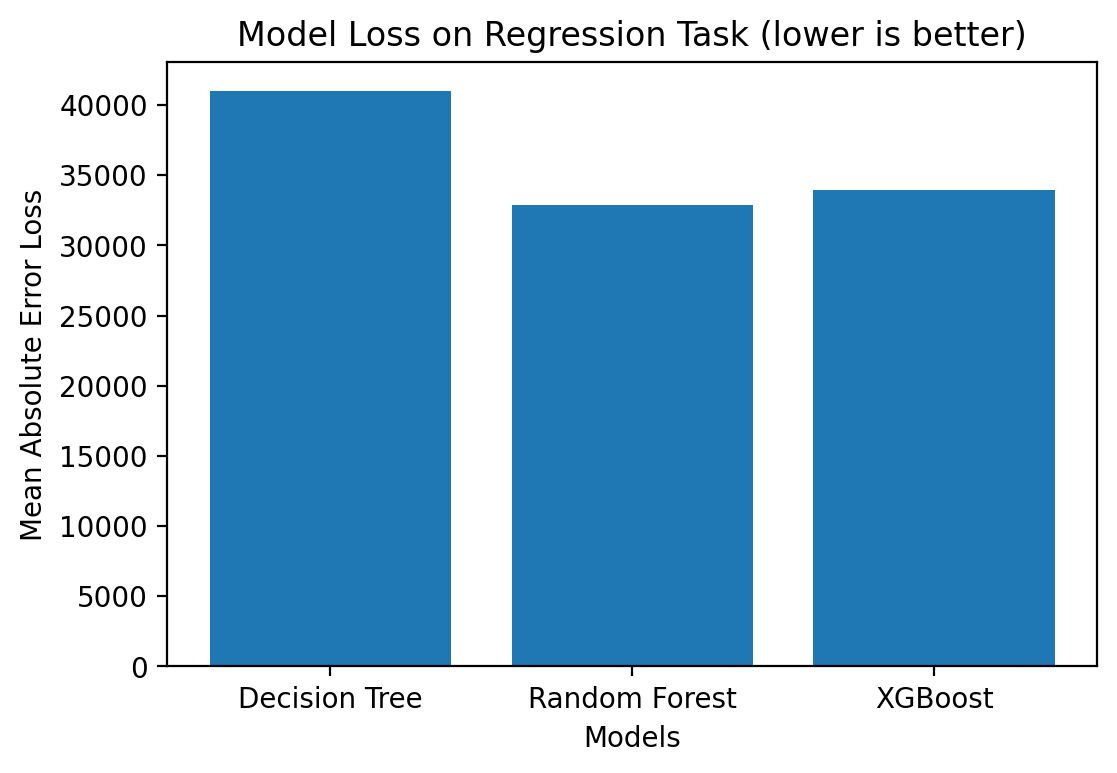

In [36]:
tree_loss = metrics.mean_absolute_error(reg_tree.predict(X_test_reg), Y_test_reg)
rf_loss = metrics.mean_absolute_error(reg_rf.predict(X_test_reg), Y_test_reg)
xgb_loss = metrics.mean_absolute_error(reg_xgb.predict(X_test_reg), Y_test_reg)


figure(figsize=(6, 4), dpi=200)

plt.bar(["Decision Tree", "Random Forest", "XGBoost"], [tree_loss, rf_loss, xgb_loss])
plt.title("Model Loss on Regression Task (lower is better)")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error Loss")
plt.show()